In [1]:
import numpy as np 
import pandas as pd

In [3]:
import mnist
xtrain, xtest, ytrain, ytest = mnist.train_images(), mnist.test_images(), mnist.train_labels(), mnist.test_labels()

In [5]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
def normalization(data):
 return (data/255)

In [6]:
xtrain=normalization(xtrain)
xtest=normalization(xtest)

In [11]:
print(ytrain[:5])
print(type(ytrain[0]))

[5 0 4 1 9]
<class 'numpy.uint8'>


In [15]:
from keras.utils import to_categorical
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [12]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
cnn = Sequential([
Conv2D(filters=32, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu', input_shape=(28, 28, 1)),
MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.2),
Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu'),
MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.2),
Flatten(),
Dense(units=128, activation='relu'),
Dense(units=10, activation='softmax'),
])

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy

cnn.compile(optimizer=Adam(learning_rate=0.001),
            loss=CategoricalCrossentropy(),
            metrics=["acc"])

history = cnn.fit(xtrain, ytrain, epochs=9, batch_size=256, validation_data=(xtest, ytest))

Epoch 1/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - acc: 0.8276 - loss: 0.5770 - val_acc: 0.9774 - val_loss: 0.0746
Epoch 2/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 125ms/step - acc: 0.9729 - loss: 0.0887 - val_acc: 0.9833 - val_loss: 0.0483
Epoch 3/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.9815 - loss: 0.0598 - val_acc: 0.9843 - val_loss: 0.0443
Epoch 4/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 129ms/step - acc: 0.9855 - loss: 0.0471 - val_acc: 0.9872 - val_loss: 0.0359
Epoch 5/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.9876 - loss: 0.0381 - val_acc: 0.9892 - val_loss: 0.0306
Epoch 6/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - acc: 0.9898 - loss: 0.0309 - val_acc: 0.9897 - val_loss: 0.0274
Epoch 7/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - acc: 0.9909 - loss: 0.0280 - val_acc: 0.9898 - val_loss: 0.0267
Epoch 8/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - acc: 0.9925 - loss: 0.0239 - val_acc: 0.9900 - val_loss: 0.0255
Epoch 9/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 2

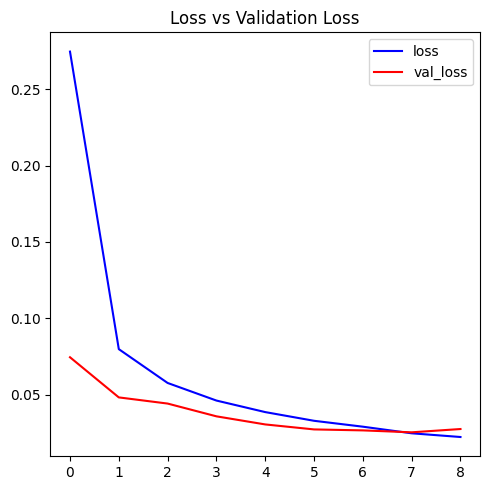

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend()
plt.title('Loss vs Validation Loss')
plt.tight_layout()

In [ ]:
# hence it is not overfitting the model ad we get an accuracy of 99 percent

In [19]:
cnn.evaluate(xtest,ytest)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9881 - loss: 0.0355


0.9904000163078308